In [2]:
# 1:
# build a function that computes the probability of my dataset given S1, I1 and q and returns the probability of the dataset
# 2: 
# input that dataset and input q values and to make a plot of q values by the probability of the dataset given q (likelihood function)

Imports

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import binom, poisson
import matplotlib.pyplot as plt
import statistics as stat

: 

In [88]:
def reedFrost(i, s, q, numGen):
    r = 0

    I = [i]
    S = [s]
    R = [r]
    prob = []

    for z in range(numGen):
        n = S[-1]
        p = (1-q**(I[-1]))
        I.append(int(binom.rvs(n,p, size=1)))
        prob.append(binom.pmf(k=I[-1], n=n, p=p))
        S.append(S[-1]-I[-1])
        R.append(R[-1]+I[-2])
    distrProb = np.prod(prob)
    return [distrProb, I]

#1 build a function that computes the probability of my dataset given S1, I1 and q and returns the probability of the dataset

In [172]:
#Givens:
numGen = 20;
s = 2000
q = .999
i = 2

output = reedFrost(i,s,q, numGen)
print("DataSet: " + str(output[1]))
print("DistrProb: " + str(output[0]))



DataSet: [2, 9, 20, 54, 91, 149, 239, 325, 307, 219, 119, 42, 19, 2, 0, 0, 0, 0, 0, 0, 0]
DistrProb: 2.042854289350434e-22


#2 input that dataset and input q values and to make a plot of q values by the probability of the dataset given q (likelihood function)

In [167]:
def likelihood(data):

    qList = np.linspace(0, 1, 500)
    y = []
    for ele in qList:
        y.append(reedFrost(i, s, ele, numGen)[0])

    plt.plot(qList, y)
    plt.xlabel("Q Values")
    plt.ylabel("DistrProb")
    plt.grid()
    plt.show()

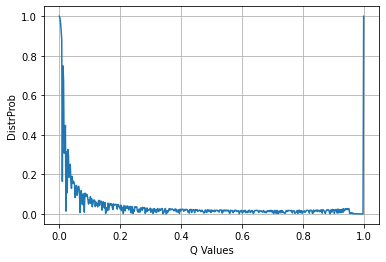

In [168]:
likelihood(output[0])

In [175]:
def reedFrostSim(i, s, q, numRep, numGen):
    r = 0

    I = [i]
    S = [s]
    R = [r]

    for z in range(numGen):
        I.append(int(binom.rvs(S[-1],(1-q**(I[-1])), size=1)))
        S.append(S[-1]-I[-1])
        R.append(R[-1]+I[-2])

    return [I,S,R]

In [269]:
def reedLikelihood(I,S,q):
    prob = []
    for t in range(len(I)-1):
        n = S[t]
        p = (1-q**(I[t]))
        prob.append(np.log(binom.pmf(k=I[t+1], n=n, p=p)))
    
    distrProb = sum(prob)
    return distrProb

In [270]:
numGen = 20;
s = 2000
q = .9
i = 2
I,S,R = reedFrostSim(i,s,q, 1, numGen)


C:\Users\Mase\AppData\Local\Temp\ipykernel_3420\3811964176.py:6: RuntimeWarning: divide by zero encountered in log
  prob.append(np.log(binom.pmf(k=I[t+1], n=n, p=p)))


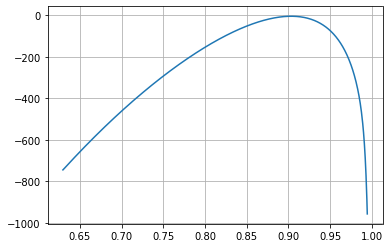

In [272]:
likelihood = []
space = np.linspace(.5, 1, 1000)
for q in space:
    likelihood.append(reedLikelihood(I,S,q))

plt.plot(space, likelihood)
plt.grid()
plt.show()